#### Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.

Importing all the required libraries 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import numpy as np

#### i) Start your data from the first day of infections in US. X-Axis - number of days since the first case, Y-Axis - number of new cases and deaths.

Defining a function usa_data which accepts the dataframe and a column name. This function preprocess the data and returns a dataframe which contains three columns

In [2]:
def usa_data(df,x):
    temp = df
    temp = temp[temp['countyFIPS'] != 0] #removing records whose countyFIPS =0
    new_cols = temp.iloc[:, 4:].sum()   #calculating the sum of the rows for a particular column starting from 4th column
    filter_data = pd.DataFrame(columns=temp.columns[4:]) #appending the column names into a new dataframe
    filter_data = filter_data.append(new_cols, ignore_index=True) #appending the sum of individual columns to the new dataframe
    new_temp = filter_data.diff(axis=1) # now calculating the difference between the columns
    new_temp = new_temp.fillna(0)   #filling NaN with 0
    new_temp.clip(lower=0, inplace = True)  
    day_list = list(new_temp.iloc[0])   #taking the 0th row into a list
    y = []
    for i in day_list:
        if int(i) >= 1:
            y = day_list.index(i)     #storing the index value into y
            break
    y1 = []
    day = 1
    for i in range(len(day_list)):
        if(i >= y and i!= 'NaN'):
            y1.append(day)                #appending the day value into the list 
            day = day+1
        else:
            y1.append(0)
    new_temp1 = pd.melt(frame = new_temp, var_name= ['Date'], value_name= x)  #melting the dataframe on date
    new_temp1['on_particula_day'] = y1  #adding a new column with y1 values
    new_temp1.drop(new_temp1.iloc[:y,:].index.tolist(), inplace=True)   #dropping the values until that index as they are not start date of infection
    return new_temp1

Reference: https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/, https://www.askpython.com/python/examples/polynomial-regression-in-python
clip function from stackoverflow.

#### ii) Calculate and report Root Mean Square Error (RMSE) for your models (linear and non-linear). Discuss bias versus variance tradeoff.

Defining a function reg which accepts a dataframe and produces linear regression models and non-linear regression models and also calculates rmse for both linear and non-linear regression models

In [3]:
def reg(df):
    X = df.iloc[:,0:1]  
    y = df.iloc[:,1:2]  
    reg = LinearRegression().fit(X,y)   #fitting a linear regression model
    predict = reg.predict(X)            #predictions based on the training
    plt.figure(figsize=(15,10))
    plt.title("Linear regression")
    plt.scatter(X, y, color='blue')
    plt.plot(X, predict , color='black', linewidth = 2, label='Linear Regression')  #plotting the linear regression 
    plt.legend()
    print('RMSE for Linear Regression:', np.sqrt(mean_squared_error(y,predict))) #calculating the rmse for linear regression
    c = ['','','lime','orange','pink','green']    #list which contains the colors for each degree starting from two
    fig = plt.figure('new')
    plt.figure(figsize=(15,10))
    plt.title("Non-Linear (polynomial) regression")
    plt.scatter(X, y, color='blue')
    for i in range(2,6): #1 is linear reg. 
        preg = PolynomialFeatures(degree=i)
        predict1 = preg.fit_transform(X)    #fitting non-linear regression model
        predict_total = LinearRegression().fit(predict1,y)
        plt.plot(X, predict_total.predict(predict1) , color= c[i], linewidth = 2, label='Poly Linear Regression with degree %d'%i)# plotting the non-linear regression
        print('RMSE for Polynomial Regression with degree %d:'%i, np.sqrt(mean_squared_error(y,predict_total.predict(predict1))))  #calculating the rmse for non-linear regression
    plt.legend()
    return reg.coef_

#### iii) Plot trend line along for the data along with the forecast of 1 week ahead.

Defining a function predict_reg which accepts a dataframe, days and produces prediction of linear-regression and non-linear regression models based on number of days 

In [4]:
def predict_reg(df, days):
    X = df.iloc[:,0:1]
    y = df.iloc[:,1:2]
    reg = LinearRegression().fit(X,y)  #Fitting a linear regression model
    predict = reg.predict(X)
    
    X1 = np.arange(len(X),len(X)+days).reshape(-1, 1) #here days is given through input
    #print(X1)
    new_predict = reg.predict(X1)    #predictions for the given days
    plt.figure(figsize=(15,10))
    plt.title("Linear regression")
    plt.scatter(X, y, color='blue')
    plt.plot(X, predict , color='black', linewidth = 2, label='Linear Regression') # plotting linear regression
    plt.plot(X1, new_predict , color='purple',linestyle='dashed', linewidth= 5, label='Linear Regression')  #plotting linear regression for the added days
    plt.legend()
    print('One week predictions Linear Regression:', new_predict)  
    c = ['','','lime','orange','pink','green']  #list which contains the colors for each degree starting from two
    fig = plt.figure('new')
    plt.figure(figsize=(15,10))
    plt.title("Non-Linear (polynomial) regression")
    plt.scatter(X, y, color='blue')
    for i in range(2,6): #1 is linear reg.
        preg = PolynomialFeatures(degree=i)
        predict1 = preg.fit_transform(X)     #fitting a non-linear regression model
        predict_total = LinearRegression().fit(predict1,y)
        
        predict2 = preg.fit_transform(X1)   #fitting a non-linear regression model for added days
        #new_predict_total = LinearRegression().fit(predict2,y)
        plt.plot(X, predict_total.predict(predict1) , color= c[i], linewidth = 2, label='Poly Linear Regression with degree %d'%i) #plotting non-linear regression model
        plt.plot(X1, predict_total.predict(predict2) , linestyle='dashed', color= c[i], linewidth = 5, label='Poly Linear Regression with degree %d'%i) #plotting non-linear regression model for added days
        print('One week predictions for Poly Linear Regression with degree %d'%i, predict_total.predict(predict2))
    plt.legend()
    return reg.coef_


Calling function usa_data passing covid cases dataset and other as cases which in returns a dataframe which contains date, cases and on-particula_day columns

In [5]:
covid_cases = usa_data(df = pd.read_csv('../../../data/stage_1/covid_confirmed_usafacts.csv'), x = 'cases')
covid_cases

,Date,cases,on_particula_day
2,2020-01-24,1,1
3,2020-01-25,0,2
4,2020-01-26,3,3
5,2020-01-27,1,4
6,2020-01-28,0,5
...,...,...,...
568,2021-08-12,116470,567
569,2021-08-13,273824,568
570,2021-08-14,34148,569
571,2021-08-15,19392,570


Now passing the above obtained covid_cases dataframe to the reg function in order to obtain the linear and non-linear regression models and also rmse error

RMSE for Linear Regression: 62714.21609478131
RMSE for Polynomial Regression with degree 2: 54916.14374069963
RMSE for Polynomial Regression with degree 3: 54487.18974655347
RMSE for Polynomial Regression with degree 4: 49067.62208492077
RMSE for Polynomial Regression with degree 5: 41726.69191009244


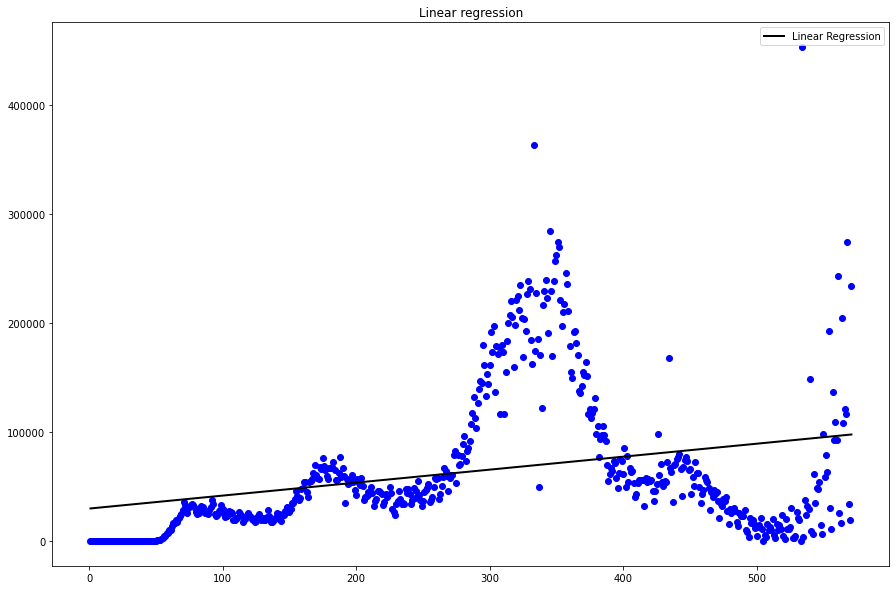

<Figure size 432x288 with 0 Axes>

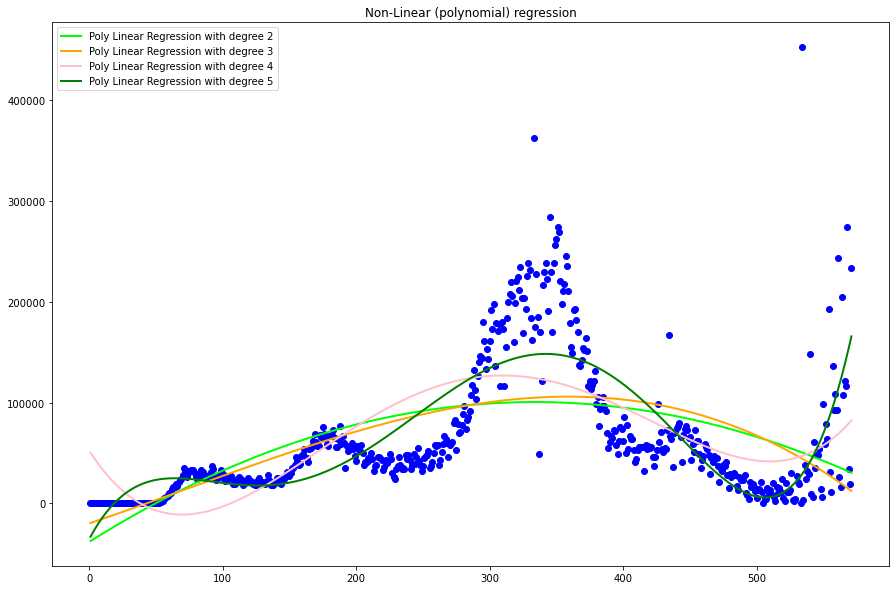

In [6]:
res = reg(covid_cases[['on_particula_day', 'cases']])

Calling the predict_reg function by passing the same covid_cases dataframe and days equal to 7 as one week forecast ahead is asked. This function produces the predictions of linear and non-linear models for the added days 

One week predictions Linear Regression: [[97671.09447295]
 [97789.96165545]
 [97908.82883795]
 [98027.69602045]
 [98146.56320295]
 [98265.43038545]
 [98384.29756795]]
One week predictions for Poly Linear Regression with degree 2 [[30302.64051509]
 [29709.87348781]
 [29114.61387135]
 [28516.86166571]
 [27916.61687089]
 [27313.8794869 ]
 [26708.64951374]]
One week predictions for Poly Linear Regression with degree 3 [[12367.44510019]
 [11393.76537558]
 [10414.25174284]
 [ 9428.89251904]
 [ 8437.67602124]
 [ 7440.59056651]
 [ 6437.62447191]]
One week predictions for Poly Linear Regression with degree 4 [[82203.94533014]
 [83719.74863805]
 [85269.11689118]
 [86852.36021557]
 [88469.78986052]
 [90121.71819857]
 [91808.45872548]]
One week predictions for Poly Linear Regression with degree 5 [[165623.78900722]
 [171639.04929849]
 [177798.96240903]
 [184105.39618352]
 [190560.23183378]
 [197165.36398152]
 [203922.70070104]]


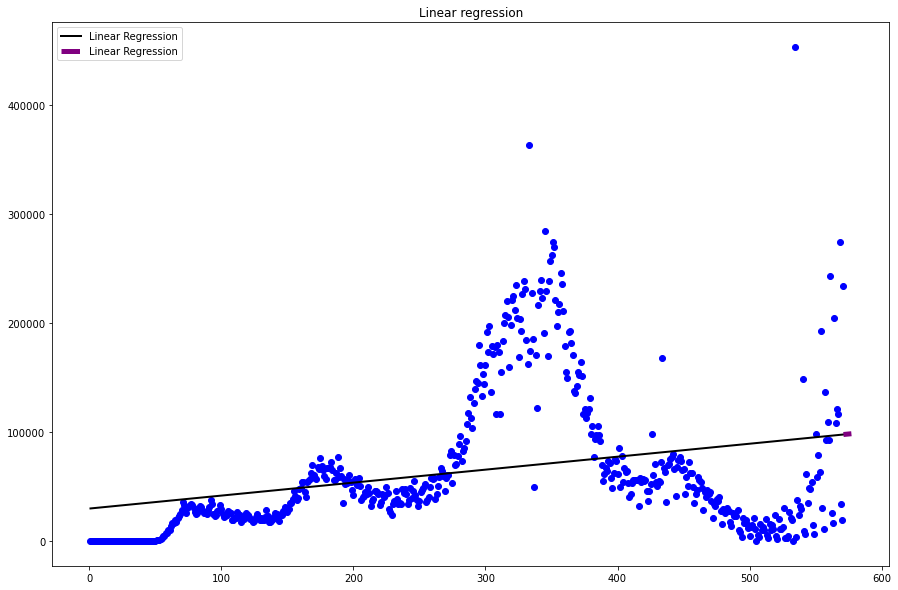

<Figure size 432x288 with 0 Axes>

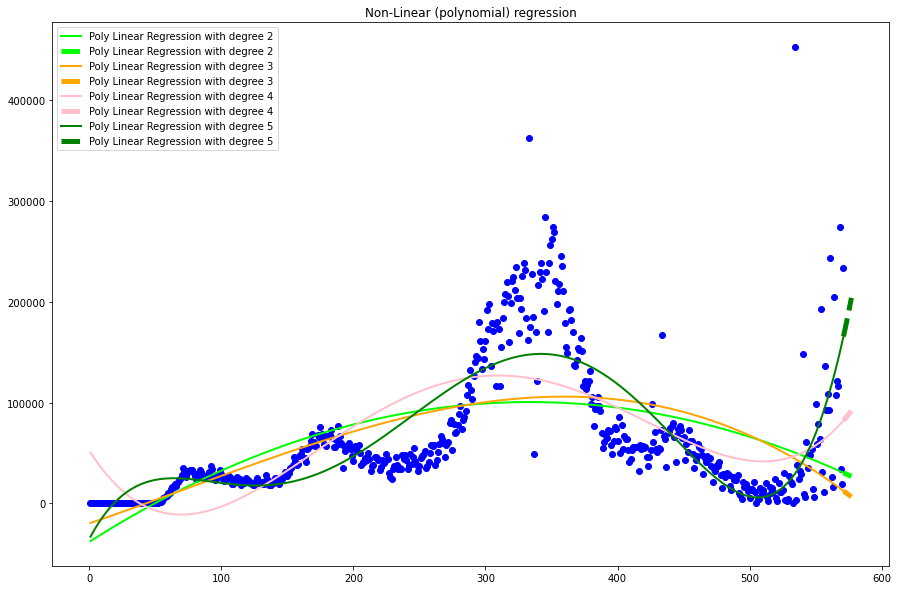

In [7]:
res1 = predict_reg(covid_cases[['on_particula_day', 'cases']], days = 7)

-------------------------------------------------------------------------------------------------------------------------------

### Deaths 

Calling function usa_data passing covid deaths dataset and other as deaths which in returns a dataframe which contains date, deaths and on-particula_day columns

In [8]:
covid_deaths = usa_data(df = pd.read_csv('../../../data/stage_1/covid_deaths_usafacts.csv'),x = 'deaths')
covid_deaths

,Date,deaths,on_particula_day
15,2020-02-06,1,1
16,2020-02-07,0,2
17,2020-02-08,0,3
18,2020-02-09,0,4
19,2020-02-10,0,5
...,...,...,...
568,2021-08-12,609,554
569,2021-08-13,852,555
570,2021-08-14,154,556
571,2021-08-15,45,557


Now passing the above obtained covid_deaths dataframe to the reg function in order to obtain the linear and non-linear regression models and also rmse error

RMSE for Linear Regression: 992.6817817081455
RMSE for Polynomial Regression with degree 2: 869.9035082404372
RMSE for Polynomial Regression with degree 3: 849.4157029730479
RMSE for Polynomial Regression with degree 4: 849.2227607850864
RMSE for Polynomial Regression with degree 5: 698.2840913225779


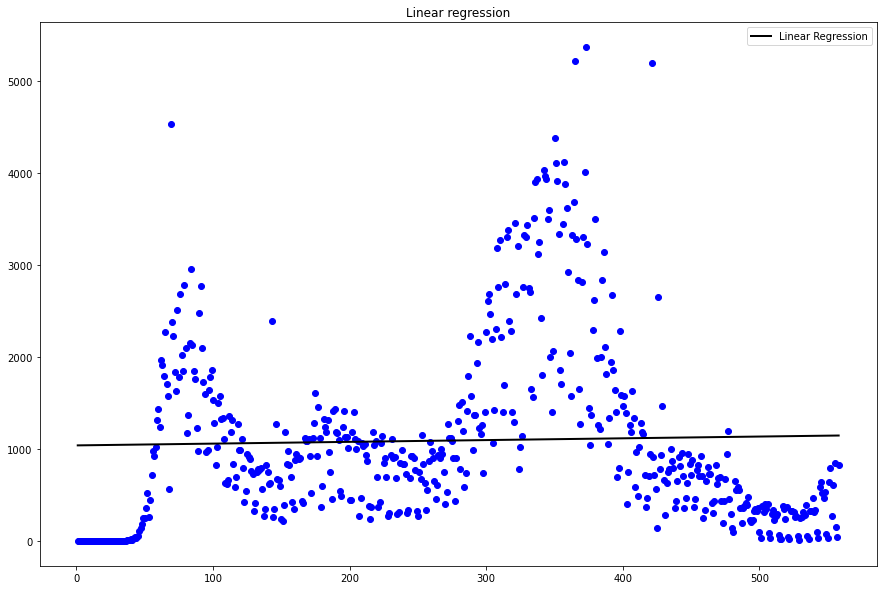

<Figure size 432x288 with 0 Axes>

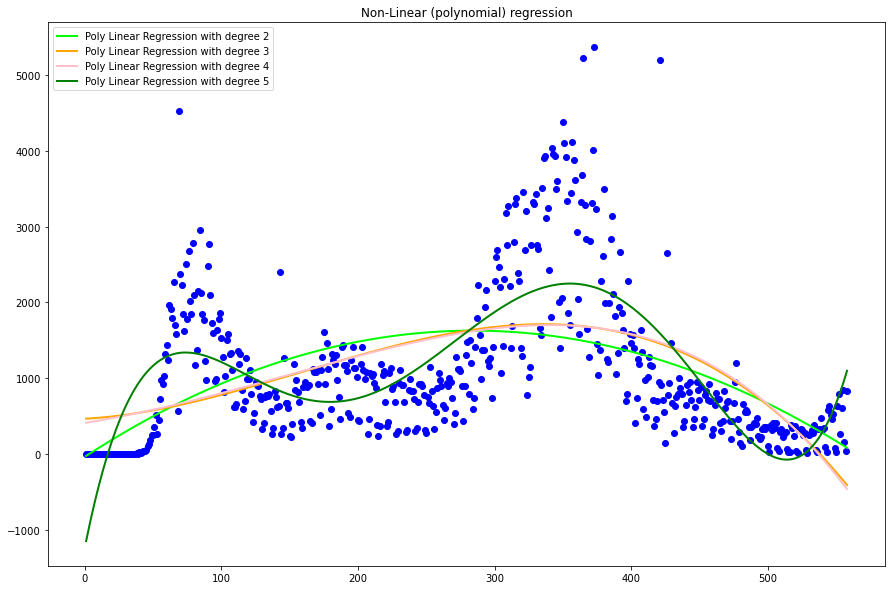

In [33]:
res = reg(covid_deaths[['on_particula_day', 'deaths']])

Calling the predict_reg function by passing the same covid_deaths dataframe and days equal to 7 as one week forecast ahead is asked. This function produces the predictions of linear and non-linear models for the added days

One week predictions Linear Regression: [[1147.18039766]
 [1147.37266977]
 [1147.56494187]
 [1147.75721398]
 [1147.94948608]
 [1148.14175819]
 [1148.33403029]]
One week predictions for Poly Linear Regression with degree 2 [[83.60343108]
 [72.29764807]
 [60.95065339]
 [49.56244705]
 [38.13302904]
 [26.66239936]
 [15.15055802]]
One week predictions for Poly Linear Regression with degree 3 [[-407.64947624]
 [-429.63432357]
 [-451.75624429]
 [-474.01558138]
 [-496.4126778 ]
 [-518.94787654]
 [-541.62152057]]
One week predictions for Poly Linear Regression with degree 4 [[-460.99555547]
 [-484.92714794]
 [-509.02734397]
 [-533.29675007]
 [-557.73597369]
 [-582.34562322]
 [-607.12630801]]
One week predictions for Poly Linear Regression with degree 5 [[1100.17419643]
 [1162.44075487]
 [1226.71672142]
 [1293.03274238]
 [1361.41971447]
 [1431.90878573]
 [1504.53135641]]


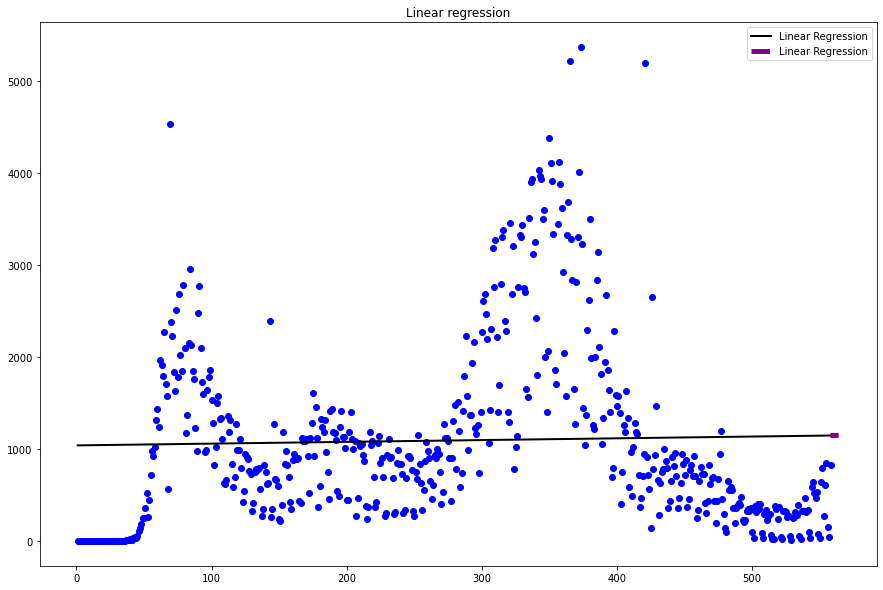

<Figure size 432x288 with 0 Axes>

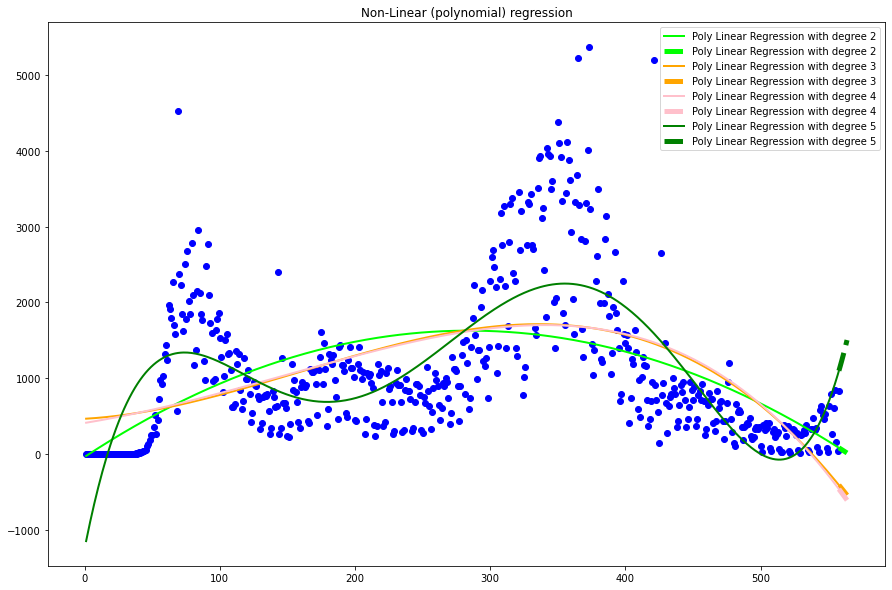

In [10]:
res1 = predict_reg(covid_deaths[['on_particula_day', 'deaths']], days = 7)

#### bias vs variance:

- It will tell about prediction error and contribute to model accuarcy.
- By setting modest value of regularization constant, we can minimize bias and variance tardeoff for best models.
- overfitting and underfitting problems will be resolved with better understanding of this tradeoff.<br>

<br>The data is mostly high bias and low variance for linear regression model. While working with non-linear regression models as degree increases, we will see low bias and high variance.

Even high variance may result in overfitting problem, so we have to take model with moderate bias and moderate variance.


## Comparing with other countires trends

Reading the owid covid dataset 

In [11]:
world_data1 = pd.read_csv('../../../data/stage_2/owid-covid-data.csv')
#world_data1 = world_data[world_data["location"].isin(["Indonesia", "Pakistan", "Brazil", "Nigeria", "Bangladesh"])]
world_data1

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165403,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165404,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165405,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165406,ZWE,Africa,Zimbabwe,2022-02-28,236380.0,577.0,401.286,5395.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Defining a function world_data which accepts a dataframe, location and a column. This function preprocess the data and returns a dataframe which contains an additional column on_particula_day which contains the number from the start day of the cases or deaths.

In [12]:
def world_data(df,loc,x):
    temp = df
    temp = temp[temp['location'] == loc]
    temp = temp.fillna(0)
    day_list = list(temp[x])
    y = []
    for i in day_list:
        if int(i) >= 1:
            y = day_list.index(i)
            break
    y1 = []
    day = 1
    for i in range(len(day_list)):
        if(i >= y and i!= 'NaN'):
            y1.append(day)
            day = day+1
        else:
            y1.append(0)
    temp['on_particula_day'] = y1
    temp.drop(temp.iloc[:y,:].index.tolist(), inplace=True)
    return temp

Separating Indonesia data by calling function world_data and passing owid dataset, giving loc as Indonesia and column as new_cases in order to get the data of indonesia from the start day of the infection

In [13]:
indo_data = world_data(world_data1, loc = "Indonesia" , x = 'new_cases')
indo_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
70057,IDN,Asia,Indonesia,2020-03-02,2.0,2.0,0.000,0.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,1
70058,IDN,Asia,Indonesia,2020-03-03,2.0,0.0,0.000,0.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,2
70059,IDN,Asia,Indonesia,2020-03-04,2.0,0.0,0.000,0.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,3
70060,IDN,Asia,Indonesia,2020-03-05,2.0,0.0,0.000,0.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,4
70061,IDN,Asia,Indonesia,2020-03-06,4.0,2.0,0.000,0.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70782,IDN,Asia,Indonesia,2022-02-25,5457775.0,49447.0,52591.143,147586.0,244.0,220.286,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,726
70783,IDN,Asia,Indonesia,2022-02-26,5504418.0,46643.0,50771.000,147844.0,258.0,234.571,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,727
70784,IDN,Asia,Indonesia,2022-02-27,5539394.0,34976.0,48841.286,148073.0,229.0,244.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,728
70785,IDN,Asia,Indonesia,2022-02-28,5564448.0,25054.0,47503.571,148335.0,262.0,256.286,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,729


Now applying the reg function on the obtained indonesia data above by passing columns on_particula_day and new_cases to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models

RMSE for Linear Regression: 10930.77626509826
RMSE for Polynomial Regression with degree 2: 10922.654186622234
RMSE for Polynomial Regression with degree 3: 10888.86675677789
RMSE for Polynomial Regression with degree 4: 10230.262758803476
RMSE for Polynomial Regression with degree 5: 8838.388991239179


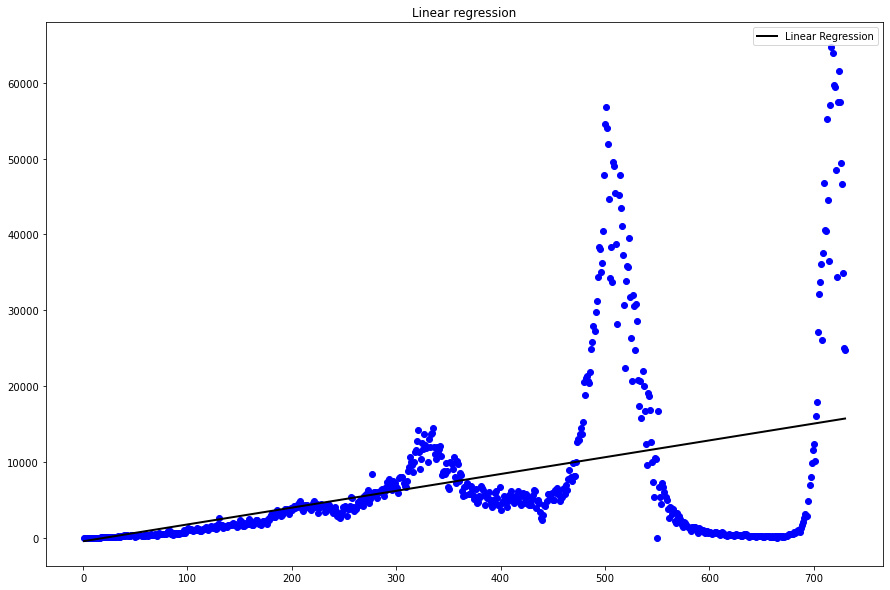

<Figure size 432x288 with 0 Axes>

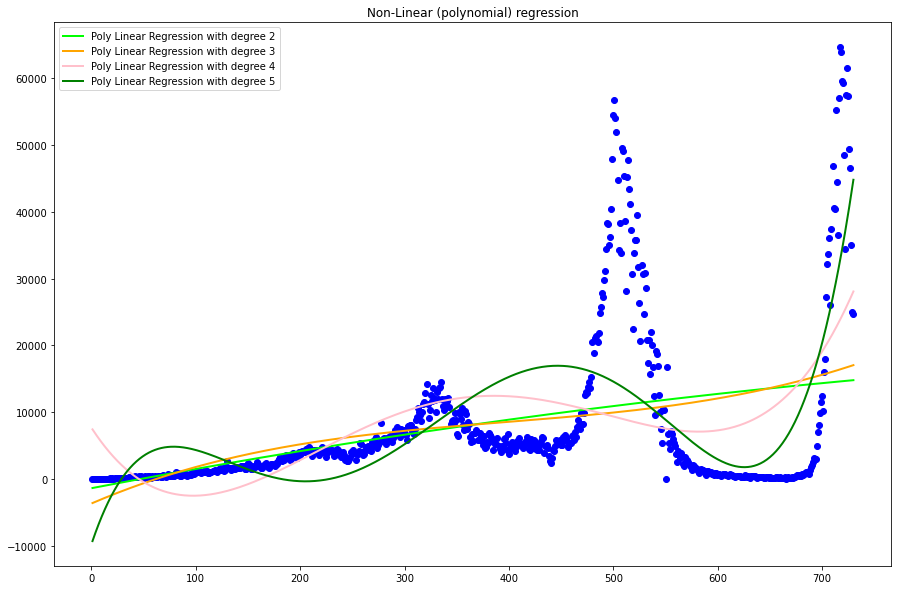

In [14]:
res_indo = reg(indo_data[['on_particula_day', 'new_cases']])

Separating Indonesia data by calling function world_data and passing owid dataset, giving loc as Indonesia and column as new_deaths in order to get the data of indonesia from the start day of the deaths

In [15]:
indo_data_deaths = world_data(world_data1, loc = "Indonesia" , x = 'new_deaths')
indo_data_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
70066,IDN,Asia,Indonesia,2020-03-11,34.0,7.0,4.571,1.0,1.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,1
70067,IDN,Asia,Indonesia,2020-03-12,34.0,0.0,4.571,1.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,2
70068,IDN,Asia,Indonesia,2020-03-13,69.0,35.0,9.286,4.0,3.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,3
70069,IDN,Asia,Indonesia,2020-03-14,96.0,27.0,13.143,5.0,1.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,4
70070,IDN,Asia,Indonesia,2020-03-15,117.0,21.0,15.857,5.0,0.0,0.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70782,IDN,Asia,Indonesia,2022-02-25,5457775.0,49447.0,52591.143,147586.0,244.0,220.286,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,717
70783,IDN,Asia,Indonesia,2022-02-26,5504418.0,46643.0,50771.000,147844.0,258.0,234.571,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,718
70784,IDN,Asia,Indonesia,2022-02-27,5539394.0,34976.0,48841.286,148073.0,229.0,244.000,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,719
70785,IDN,Asia,Indonesia,2022-02-28,5564448.0,25054.0,47503.571,148335.0,262.0,256.286,...,76.1,64.204,1.04,71.72,0.718,0.0,0.0,0.0,0.0,720


Again applying the reg function on the obtained indonesia data above by passing columns on_particula_day and new_deaths to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models for new_deaths across indonesia

RMSE for Linear Regression: 336.1906293092541
RMSE for Polynomial Regression with degree 2: 319.07309224190163
RMSE for Polynomial Regression with degree 3: 299.8972299295997
RMSE for Polynomial Regression with degree 4: 299.7012546247724
RMSE for Polynomial Regression with degree 5: 283.32004291049594


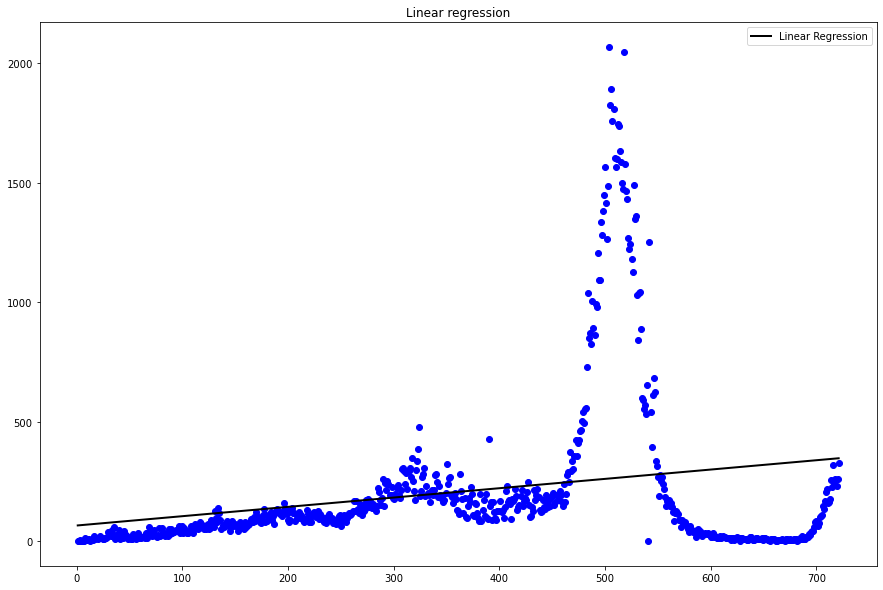

<Figure size 432x288 with 0 Axes>

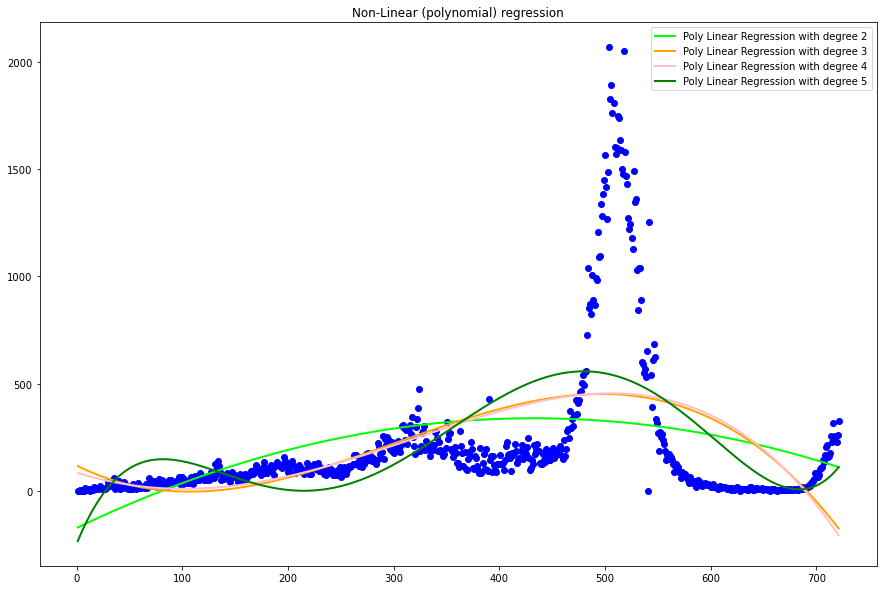

In [16]:
res_indo_deaths = reg(indo_data_deaths[['on_particula_day', 'new_deaths']])

Separating Bangladesh data by calling function world_data and passing owid dataset, giving loc as Bangladesh and column as new_cases in order to get the data of indonesia from the start day of the infection

In [17]:
ban_data = world_data(world_data1, loc = "Bangladesh" , x = 'new_cases')
ban_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
12551,BGD,Asia,Bangladesh,2020-03-08,3.0,3.0,0.000,0.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,1
12552,BGD,Asia,Bangladesh,2020-03-09,3.0,0.0,0.000,0.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,2
12553,BGD,Asia,Bangladesh,2020-03-10,3.0,0.0,0.000,0.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,3
12554,BGD,Asia,Bangladesh,2020-03-11,3.0,0.0,0.000,0.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,4
12555,BGD,Asia,Bangladesh,2020-03-12,3.0,0.0,0.000,0.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,BGD,Asia,Bangladesh,2022-02-25,1941057.0,1406.0,1700.429,29016.0,11.0,12.143,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,720
13271,BGD,Asia,Bangladesh,2022-02-26,1941816.0,759.0,1501.714,29024.0,8.0,11.429,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,721
13272,BGD,Asia,Bangladesh,2022-02-27,1942680.0,864.0,1341.286,29033.0,9.0,9.714,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,722
13273,BGD,Asia,Bangladesh,2022-02-28,1943577.0,897.0,1190.714,29037.0,4.0,9.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,723


Now applying the reg function on the obtained bangladesh data above by passing columns on_particula_day and new_cases to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models

RMSE for Linear Regression: 3123.8503432568887
RMSE for Polynomial Regression with degree 2: 3118.7339668553464
RMSE for Polynomial Regression with degree 3: 3117.8792187901226
RMSE for Polynomial Regression with degree 4: 3117.833054249292
RMSE for Polynomial Regression with degree 5: 2836.047737972691


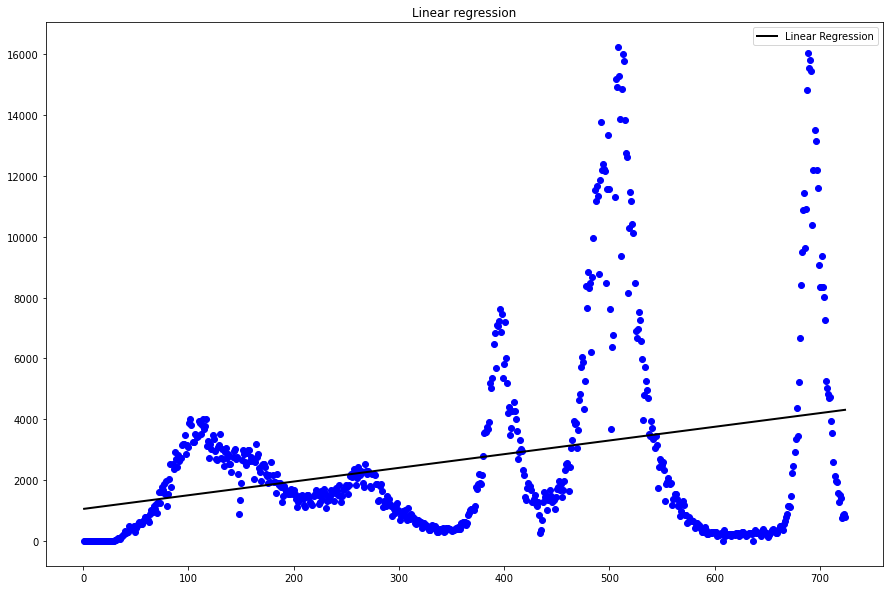

<Figure size 432x288 with 0 Axes>

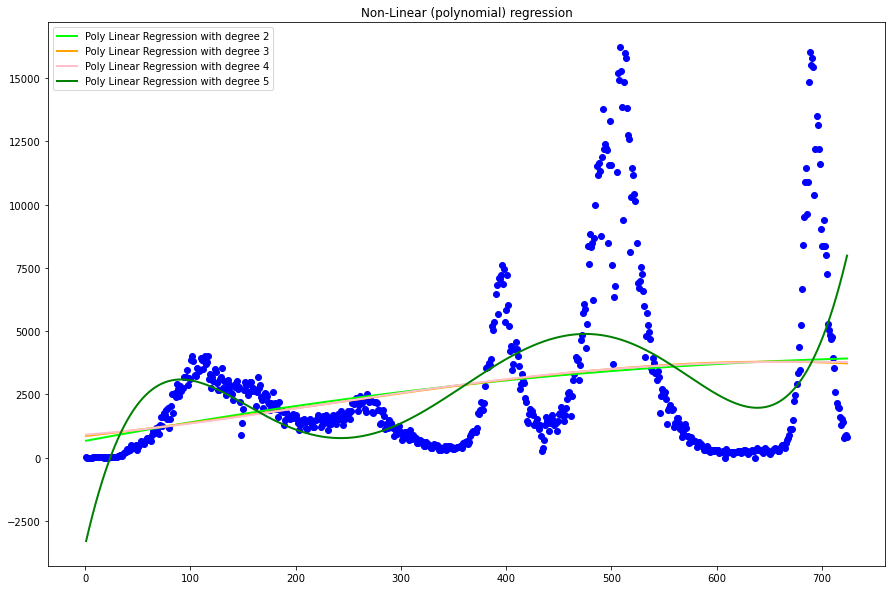

In [18]:
res_ban = reg(ban_data[['on_particula_day', 'new_cases']])

Separating Bangladesh data by calling function world_data and passing owid dataset, giving loc as Bangladesh and column as new_deaths in order to get the data of bangladesh from the start day of the deaths

In [19]:
ban_data_deaths = world_data(world_data1, loc = "Bangladesh" , x = 'new_deaths')
ban_data_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
12561,BGD,Asia,Bangladesh,2020-03-18,14.0,4.0,1.571,1.0,1.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,1
12562,BGD,Asia,Bangladesh,2020-03-19,17.0,3.0,2.000,1.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,2
12563,BGD,Asia,Bangladesh,2020-03-20,20.0,3.0,2.429,1.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,3
12564,BGD,Asia,Bangladesh,2020-03-21,25.0,5.0,3.143,2.0,1.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,4
12565,BGD,Asia,Bangladesh,2020-03-22,27.0,2.0,3.143,2.0,0.0,0.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13270,BGD,Asia,Bangladesh,2022-02-25,1941057.0,1406.0,1700.429,29016.0,11.0,12.143,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,710
13271,BGD,Asia,Bangladesh,2022-02-26,1941816.0,759.0,1501.714,29024.0,8.0,11.429,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,711
13272,BGD,Asia,Bangladesh,2022-02-27,1942680.0,864.0,1341.286,29033.0,9.0,9.714,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,712
13273,BGD,Asia,Bangladesh,2022-02-28,1943577.0,897.0,1190.714,29037.0,4.0,9.000,...,44.7,34.808,0.8,72.59,0.632,0.0,0.0,0.0,0.0,713


Again applying the reg function on the obtained bangladesh data above by passing columns on_particula_day and new_deaths to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models for new_deaths across bangladesh

RMSE for Linear Regression: 51.703607927760416
RMSE for Polynomial Regression with degree 2: 48.900523850989565
RMSE for Polynomial Regression with degree 3: 46.09793793526125
RMSE for Polynomial Regression with degree 4: 45.77068289447135
RMSE for Polynomial Regression with degree 5: 39.997982855183935


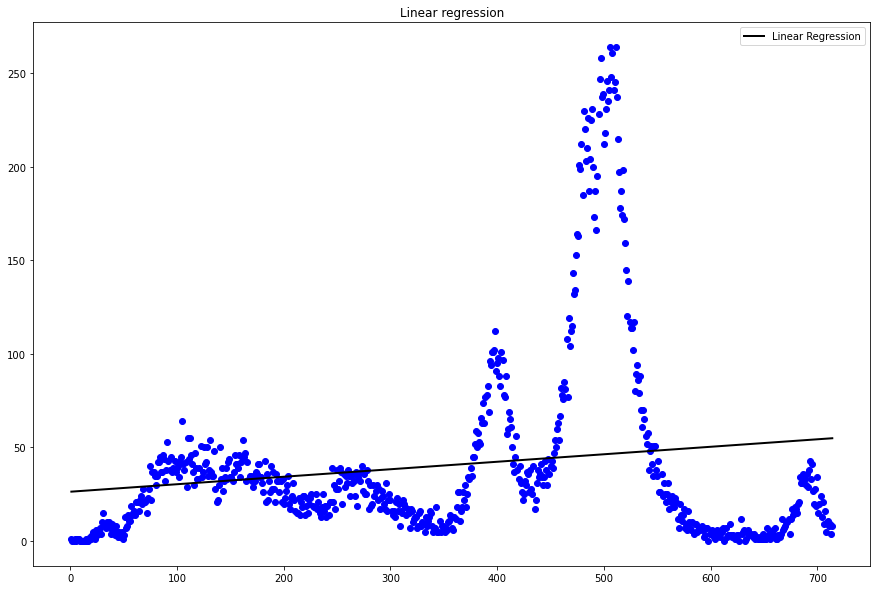

<Figure size 432x288 with 0 Axes>

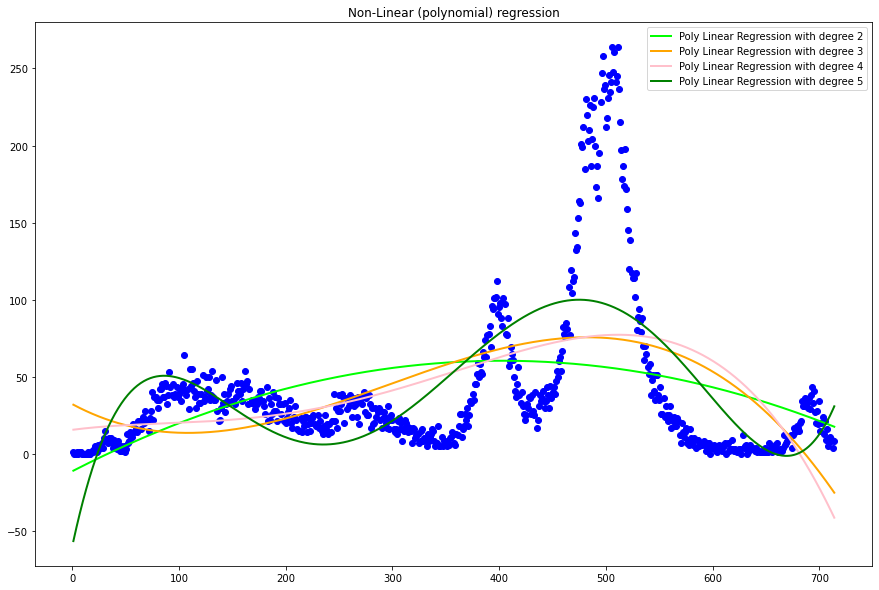

In [20]:
res_ban_deaths = reg(ban_data_deaths[['on_particula_day', 'new_deaths']])

Separating Brazil data by calling function world_data and passing owid dataset, giving loc as Bangladesh and column as new_cases in order to get the data of brazil from the start day of the infection

In [21]:
bzl_data = world_data(world_data1, loc = "Brazil" , x = 'new_cases')
bzl_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
21193,BRA,South America,Brazil,2020-02-26,1.0,1.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,1
21194,BRA,South America,Brazil,2020-02-27,1.0,0.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,2
21195,BRA,South America,Brazil,2020-02-28,1.0,0.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,3
21196,BRA,South America,Brazil,2020-02-29,2.0,1.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066,4
21197,BRA,South America,Brazil,2020-03-01,2.0,0.0,0.000,0.0,0.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21923,BRA,South America,Brazil,2022-02-25,28679671.0,90436.0,86776.143,648496.0,793.0,736.571,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,731
21924,BRA,South America,Brazil,2022-02-26,28749552.0,69881.0,81740.714,649184.0,688.0,712.714,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,732
21925,BRA,South America,Brazil,2022-02-27,28776794.0,27242.0,79802.000,649437.0,253.0,692.143,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,733
21926,BRA,South America,Brazil,2022-02-28,28796571.0,19777.0,76873.286,649676.0,239.0,679.714,...,17.9,0.0,2.2,75.88,0.765,0.0,0.00,0.00,0.000000,734


Now applying the reg function on the obtained brazil data above by passing columns on_particula_day and new_cases to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models

RMSE for Linear Regression: 34966.427103926806
RMSE for Polynomial Regression with degree 2: 34799.078797647
RMSE for Polynomial Regression with degree 3: 32442.112007262265
RMSE for Polynomial Regression with degree 4: 29315.801679955133
RMSE for Polynomial Regression with degree 5: 26877.093540463535


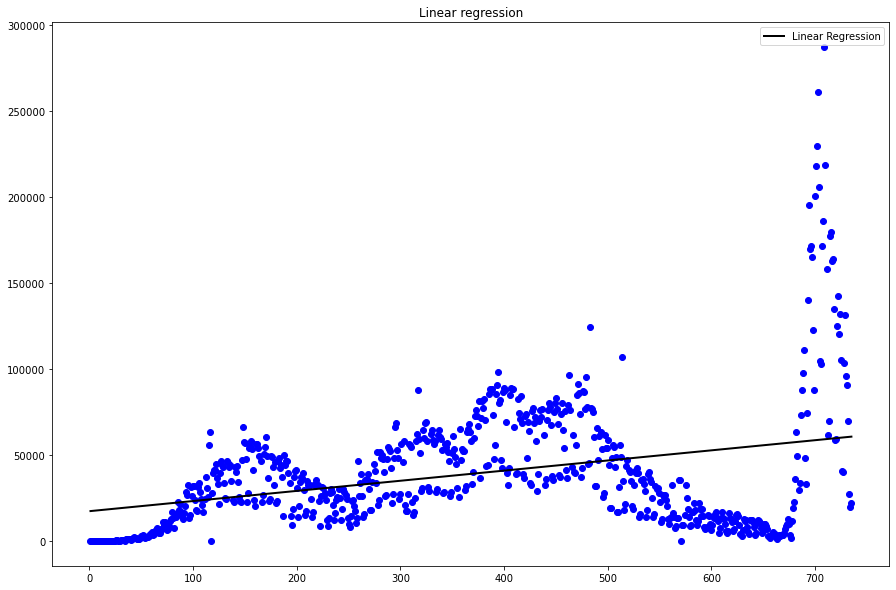

<Figure size 432x288 with 0 Axes>

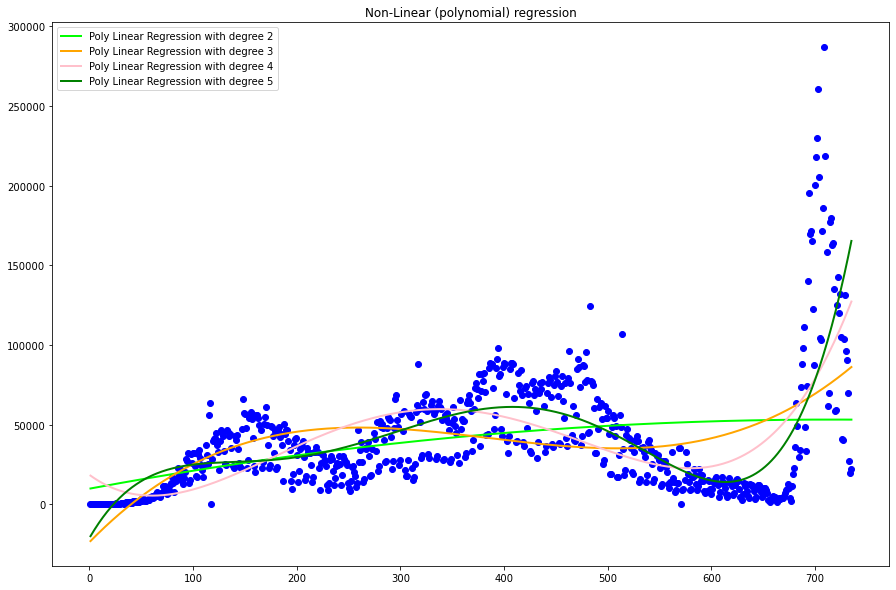

In [22]:
res_bzl = reg(bzl_data[['on_particula_day', 'new_cases']])

Separating Brazil data by calling function world_data and passing owid dataset, giving loc as Brazil and column as new_deaths in order to get the data of brazil from the start day of the deaths

In [23]:
bzl_data_deaths = world_data(world_data1, loc = "Brazil" , x = 'new_deaths')
bzl_data_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
21213,BRA,South America,Brazil,2020-03-17,321.0,121.0,41.429,1.0,1.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,1
21214,BRA,South America,Brazil,2020-03-18,372.0,51.0,47.714,3.0,2.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,2
21215,BRA,South America,Brazil,2020-03-19,621.0,249.0,81.286,6.0,3.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,3
21216,BRA,South America,Brazil,2020-03-20,793.0,172.0,91.714,11.0,5.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,4
21217,BRA,South America,Brazil,2020-03-21,1021.0,228.0,124.286,15.0,4.0,0.000,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21923,BRA,South America,Brazil,2022-02-25,28679671.0,90436.0,86776.143,648496.0,793.0,736.571,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,711
21924,BRA,South America,Brazil,2022-02-26,28749552.0,69881.0,81740.714,649184.0,688.0,712.714,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,712
21925,BRA,South America,Brazil,2022-02-27,28776794.0,27242.0,79802.000,649437.0,253.0,692.143,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,713
21926,BRA,South America,Brazil,2022-02-28,28796571.0,19777.0,76873.286,649676.0,239.0,679.714,...,17.9,0.0,2.2,75.88,0.765,0.0,0.0,0.0,0.0,714


Again applying the reg function on the obtained brazil data above by passing columns on_particula_day and new_deaths to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models for new_deaths across brazil

RMSE for Linear Regression: 763.417967871343
RMSE for Polynomial Regression with degree 2: 651.6114627305836
RMSE for Polynomial Regression with degree 3: 649.1296024416567
RMSE for Polynomial Regression with degree 4: 618.4815951857444
RMSE for Polynomial Regression with degree 5: 500.82959463162194


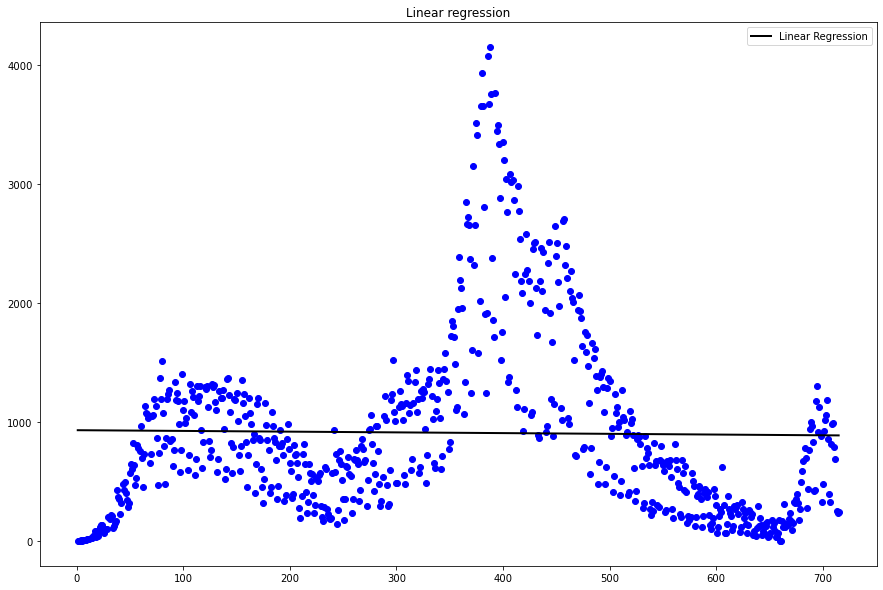

<Figure size 432x288 with 0 Axes>

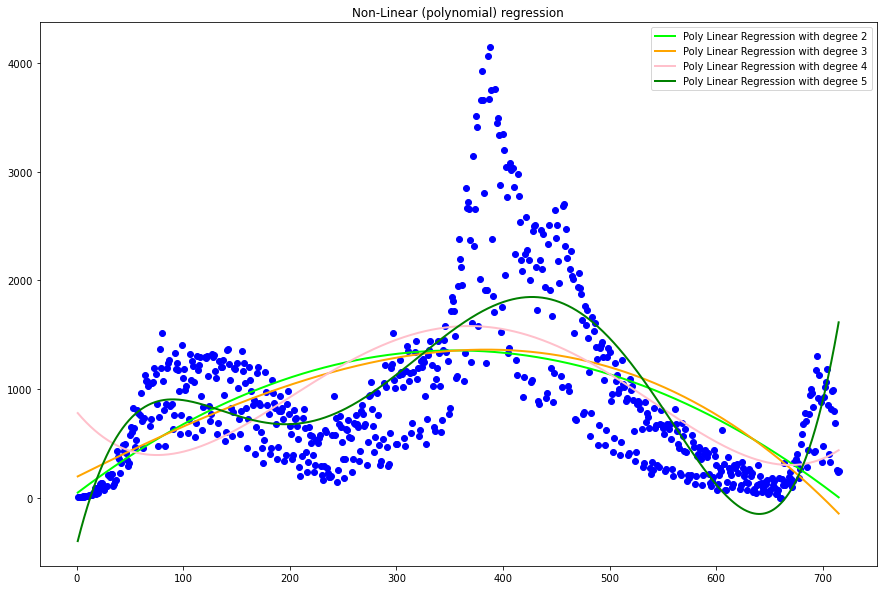

In [24]:
res_bzl_deaths = reg(bzl_data_deaths[['on_particula_day', 'new_deaths']])

Separating Pakistan data by calling function world_data and passing owid dataset, giving loc as Pakistan and column as new_cases in order to get the data of pakistan from the start day of the infection

In [25]:
pak_data = world_data(world_data1, loc = "Pakistan" , x = 'new_cases')
pak_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
114758,PAK,Asia,Pakistan,2020-02-25,2.0,2.0,0.000,0.0,0.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,1
114759,PAK,Asia,Pakistan,2020-02-26,2.0,0.0,0.000,0.0,0.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,2
114760,PAK,Asia,Pakistan,2020-02-27,2.0,0.0,0.000,0.0,0.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,3
114761,PAK,Asia,Pakistan,2020-02-28,4.0,2.0,0.000,0.0,0.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,4
114762,PAK,Asia,Pakistan,2020-02-29,4.0,0.0,0.000,0.0,0.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115489,PAK,Asia,Pakistan,2022-02-25,1507657.0,1207.0,1283.000,30153.0,14.0,25.286,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,732
115490,PAK,Asia,Pakistan,2022-02-26,1508504.0,847.0,1169.143,30173.0,20.0,23.429,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,733
115491,PAK,Asia,Pakistan,2022-02-27,1509360.0,856.0,1097.143,30178.0,5.0,19.714,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,734
115492,PAK,Asia,Pakistan,2022-02-28,1510221.0,861.0,1082.857,30196.0,18.0,20.429,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,735


Now applying the reg function on the obtained pakistan data above by passing columns on_particula_day and new_cases to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models

RMSE for Linear Regression: 1735.550176636532
RMSE for Polynomial Regression with degree 2: 1708.3511565822494
RMSE for Polynomial Regression with degree 3: 1705.0261854157989
RMSE for Polynomial Regression with degree 4: 1697.9152986120528
RMSE for Polynomial Regression with degree 5: 1553.894096394138


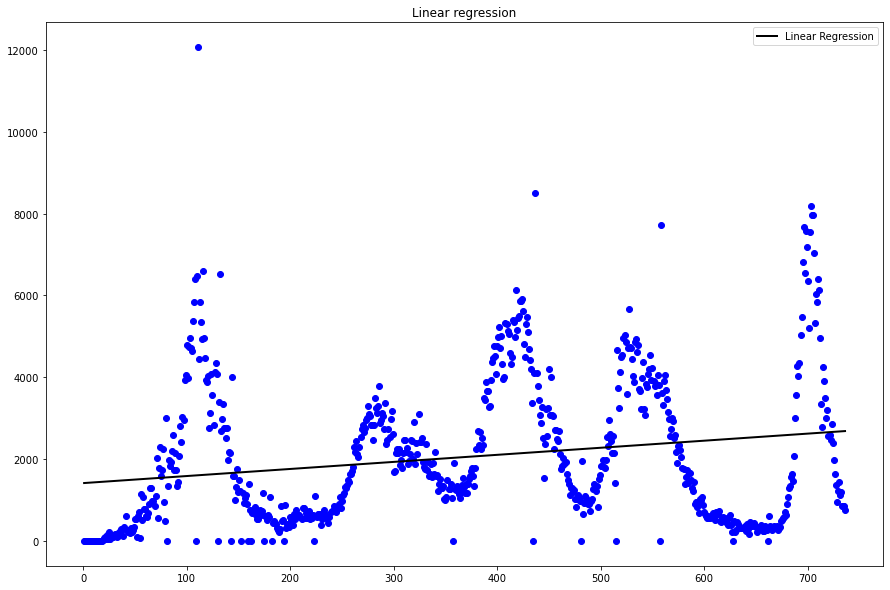

<Figure size 432x288 with 0 Axes>

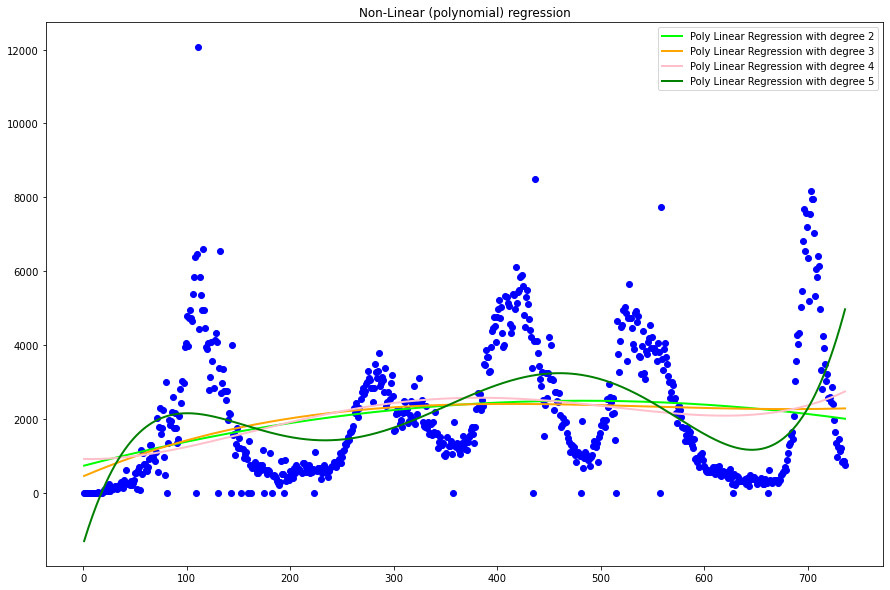

In [26]:
res_pak = reg(pak_data[['on_particula_day', 'new_cases']])

Separating pakistan data by calling function world_data and passing owid dataset, giving loc as Pakistan and column as new_deaths in order to get the data of pakistan from the start day of the deaths

In [27]:
pak_data_deaths = world_data(world_data1, loc = "Pakistan" , x = 'new_deaths')
pak_data_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
114780,PAK,Asia,Pakistan,2020-03-18,454.0,155.0,62.000,2.0,2.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,1
114781,PAK,Asia,Pakistan,2020-03-19,501.0,47.0,67.571,3.0,1.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,2
114782,PAK,Asia,Pakistan,2020-03-20,730.0,229.0,99.857,3.0,0.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,3
114783,PAK,Asia,Pakistan,2020-03-21,776.0,46.0,103.286,5.0,2.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,4
114784,PAK,Asia,Pakistan,2020-03-22,875.0,99.0,105.571,6.0,1.0,0.000,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115489,PAK,Asia,Pakistan,2022-02-25,1507657.0,1207.0,1283.000,30153.0,14.0,25.286,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,710
115490,PAK,Asia,Pakistan,2022-02-26,1508504.0,847.0,1169.143,30173.0,20.0,23.429,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,711
115491,PAK,Asia,Pakistan,2022-02-27,1509360.0,856.0,1097.143,30178.0,5.0,19.714,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,712
115492,PAK,Asia,Pakistan,2022-02-28,1510221.0,861.0,1082.857,30196.0,18.0,20.429,...,36.7,59.607,0.6,67.27,0.557,0.0,0.0,0.0,0.0,713


Again applying the reg function on the obtained pakistan data above by passing columns on_particula_day and new_deaths to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models for new_deaths across pakistan

RMSE for Linear Regression: 38.02243548519602
RMSE for Polynomial Regression with degree 2: 35.10467409608458
RMSE for Polynomial Regression with degree 3: 34.64611386919402
RMSE for Polynomial Regression with degree 4: 34.36943911840733
RMSE for Polynomial Regression with degree 5: 30.80674131081514


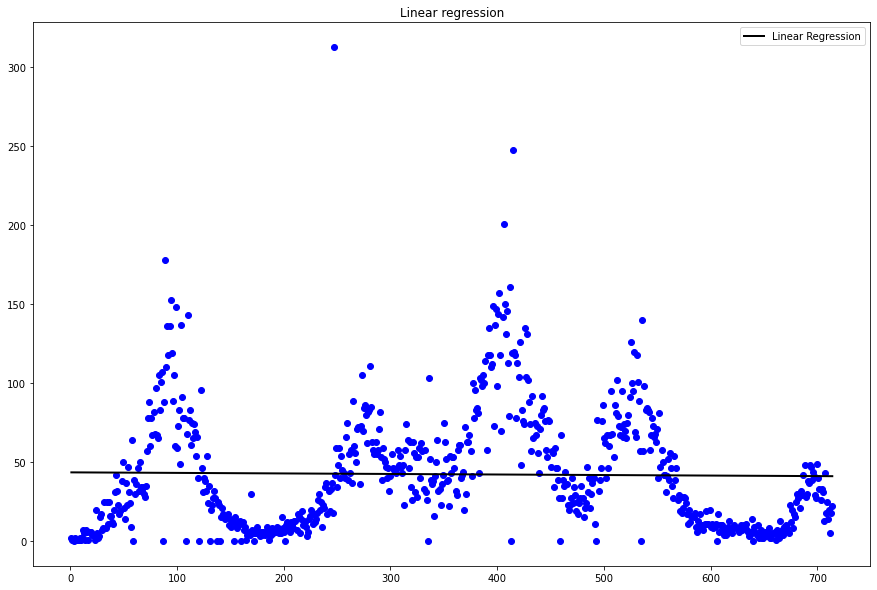

<Figure size 432x288 with 0 Axes>

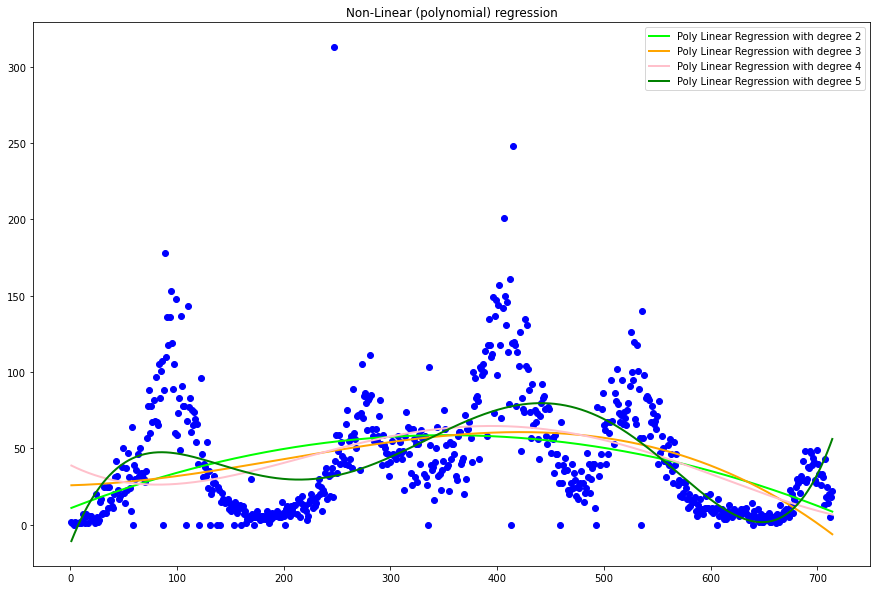

In [28]:
res_pak_deaths = reg(pak_data_deaths[['on_particula_day', 'new_deaths']])

Separating Nigeria data by calling function world_data and passing owid dataset, giving loc as Nigeria and column as new_cases in order to get the data of nigeria from the start day of the infection

In [29]:
nig_data = world_data(world_data1, loc = "Nigeria" , x = 'new_cases')
nig_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
109806,NGA,Africa,Nigeria,2020-02-28,1.0,1.0,0.000,0.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,1
109807,NGA,Africa,Nigeria,2020-02-29,1.0,0.0,0.000,0.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,2
109808,NGA,Africa,Nigeria,2020-03-01,1.0,0.0,0.000,0.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,3
109809,NGA,Africa,Nigeria,2020-03-02,1.0,0.0,0.000,0.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,4
109810,NGA,Africa,Nigeria,2020-03-03,1.0,0.0,0.000,0.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110534,NGA,Africa,Nigeria,2022-02-25,254428.0,0.0,29.571,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,729
110535,NGA,Africa,Nigeria,2022-02-26,254501.0,73.0,36.857,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,730
110536,NGA,Africa,Nigeria,2022-02-27,254525.0,24.0,40.286,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,731
110537,NGA,Africa,Nigeria,2022-02-28,254560.0,35.0,38.143,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,732


Now applying the reg function on the obtained nigeria data above by passing columns on_particula_day and new_cases to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models

RMSE for Linear Regression: 450.3012177692088
RMSE for Polynomial Regression with degree 2: 443.3029885752807
RMSE for Polynomial Regression with degree 3: 437.64579007815996
RMSE for Polynomial Regression with degree 4: 436.8553113620279
RMSE for Polynomial Regression with degree 5: 430.87747411855594


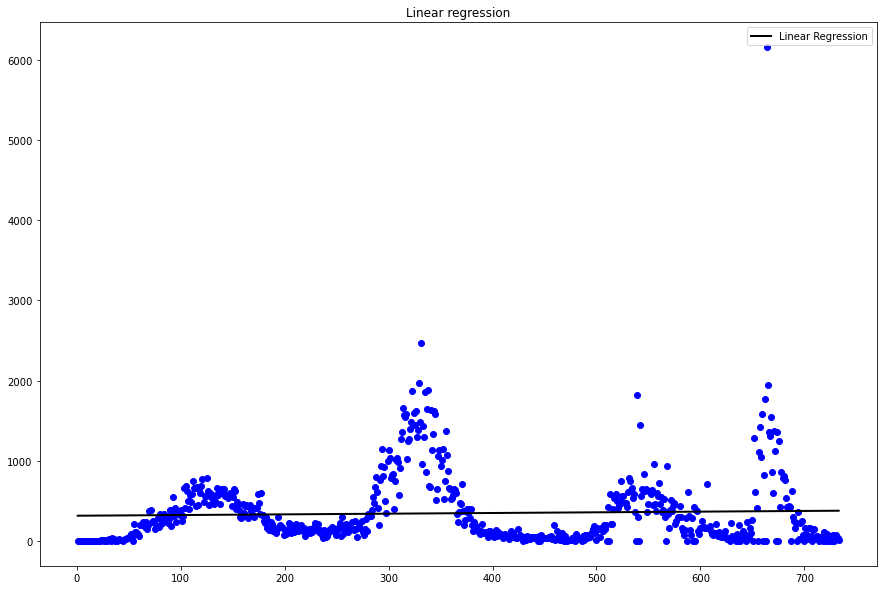

<Figure size 432x288 with 0 Axes>

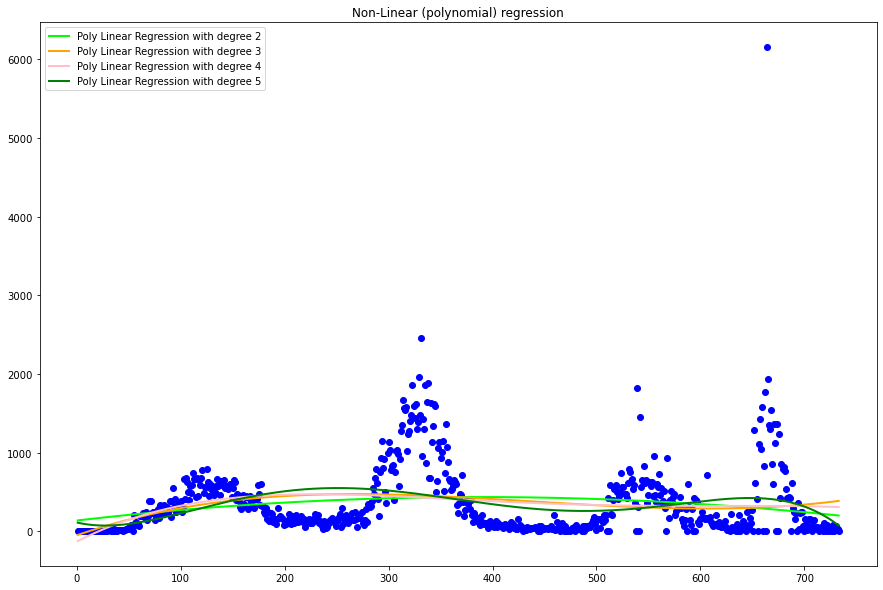

In [30]:
res_nig = reg(nig_data[['on_particula_day', 'new_cases']])

Separating nigeria data by calling function world_data and passing owid dataset, giving loc as Nigeria and column as new_deaths in order to get the data of nigeria from the start day of the deaths

In [31]:
nig_data_deaths = world_data(world_data1, loc = "Nigeria" , x = 'new_deaths')
nig_data_deaths

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,on_particula_day
109830,NGA,Africa,Nigeria,2020-03-23,40.0,10.0,5.429,1.0,1.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,1
109831,NGA,Africa,Nigeria,2020-03-24,44.0,4.0,5.857,1.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,2
109832,NGA,Africa,Nigeria,2020-03-25,51.0,7.0,6.143,1.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,3
109833,NGA,Africa,Nigeria,2020-03-26,65.0,14.0,8.143,1.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,4
109834,NGA,Africa,Nigeria,2020-03-27,70.0,5.0,8.286,1.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110534,NGA,Africa,Nigeria,2022-02-25,254428.0,0.0,29.571,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,705
110535,NGA,Africa,Nigeria,2022-02-26,254501.0,73.0,36.857,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,706
110536,NGA,Africa,Nigeria,2022-02-27,254525.0,24.0,40.286,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,707
110537,NGA,Africa,Nigeria,2022-02-28,254560.0,35.0,38.143,3142.0,0.0,0.0,...,10.8,41.949,0.0,54.69,0.539,0.0,0.0,0.0,0.0,708


Again applying the reg function on the obtained nigeria data above by passing columns on_particula_day and new_deaths to obtain the linear regression, non-linear regression models and also RMSE error for both linear and non-linear regression models for new_deaths across nigeria

RMSE for Linear Regression: 6.785153479633278
RMSE for Polynomial Regression with degree 2: 6.7794968504038815
RMSE for Polynomial Regression with degree 3: 6.774229350584591
RMSE for Polynomial Regression with degree 4: 6.6712646996433795
RMSE for Polynomial Regression with degree 5: 6.653105962400884


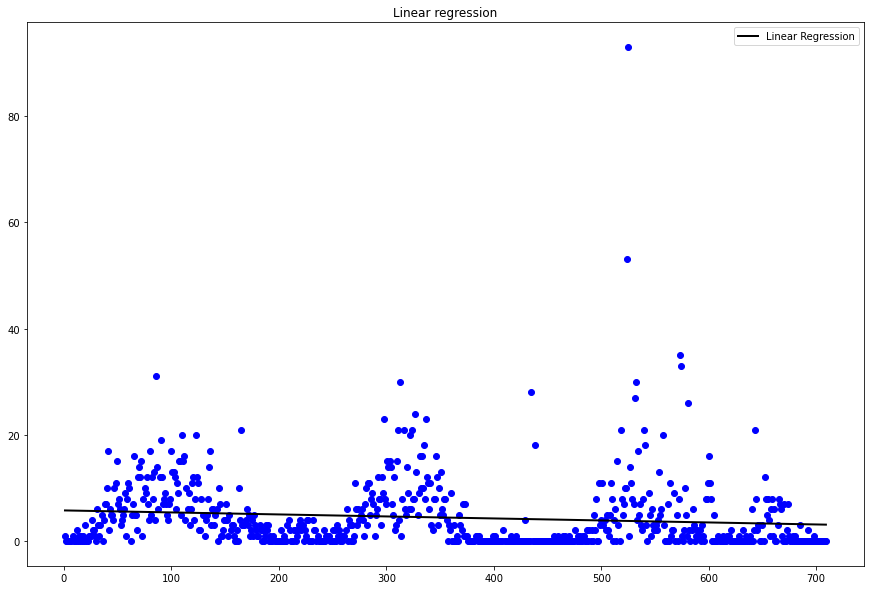

<Figure size 432x288 with 0 Axes>

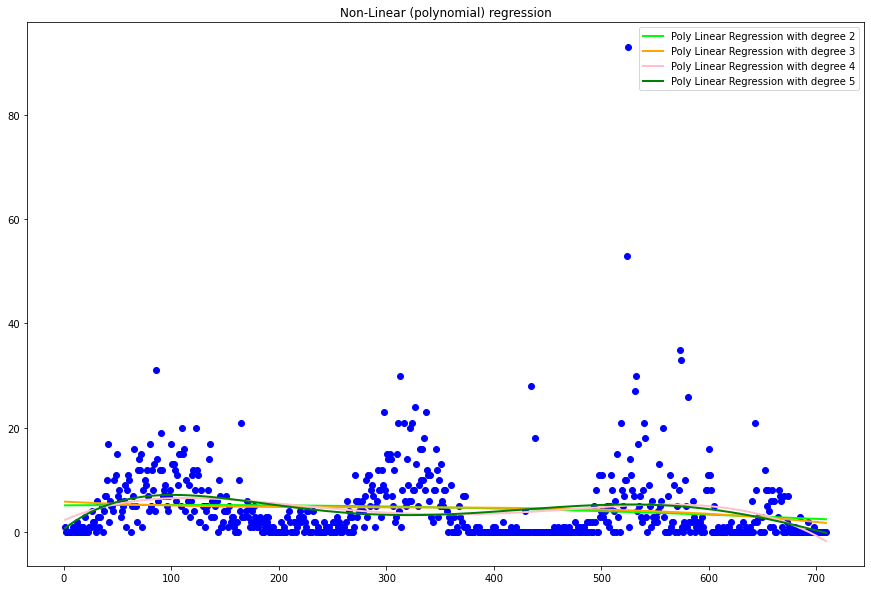

In [32]:
res_nig_deaths = reg(nig_data_deaths[['on_particula_day', 'new_deaths']])